# Week 9: Project Example

In this mini-project our will goal will be to look at Data published by US Census Bureau about the housing market in California. Given i set of features our goal is to find a model that predicts the median housing price in any district.

Like all seasoned data scientists we start by loading our notebook with the standard toolbox of packages.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

### I - First we frame the problem:

The first task we need to establish is what is the objective of our Machine learning problem. How do we intend to use this data and model in the future. Knowing the objectives is crucial in all the decision we will be taking while building our model. Decisions that relate to anything from how to clean the data to how to evaluate the model.  

Let's assume we are investors and we are trying to undervalued districts. We will use the model to estimate the median bla bla


The first questions we need to answers are: What kind of problem are we looking at?

In this particular case it is obvious that we are dealing with a supervised learning problem that requieres a multivariate regression analysis. 

This said we can still reframe the problem differently at this stage by making the target a price range instead of a median price. In this case we will be dealing with a classification problem.



### II - Get the Data

In [3]:
data_table = pd.read_csv('housing.csv')

In [5]:
data_table.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The content and structure of our dataset looks fairly comprehansible. We can explore the data even more in depth by applying the the .info() method to it.

In [9]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Initial observations:

   - The __total_bedrooms__ feature has only 20433 non-values which means we need to deal with those missing vales.
   - All features are numerical and stored as type float64 except __ocean_proximity__. Pandas loaded as type 'Object' which be any Python Object but by compering with the the .head() output we know we are dealing with strings.

In [11]:
data_table['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Next, lets look at the summary of the other features:

In [13]:
data_table.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>


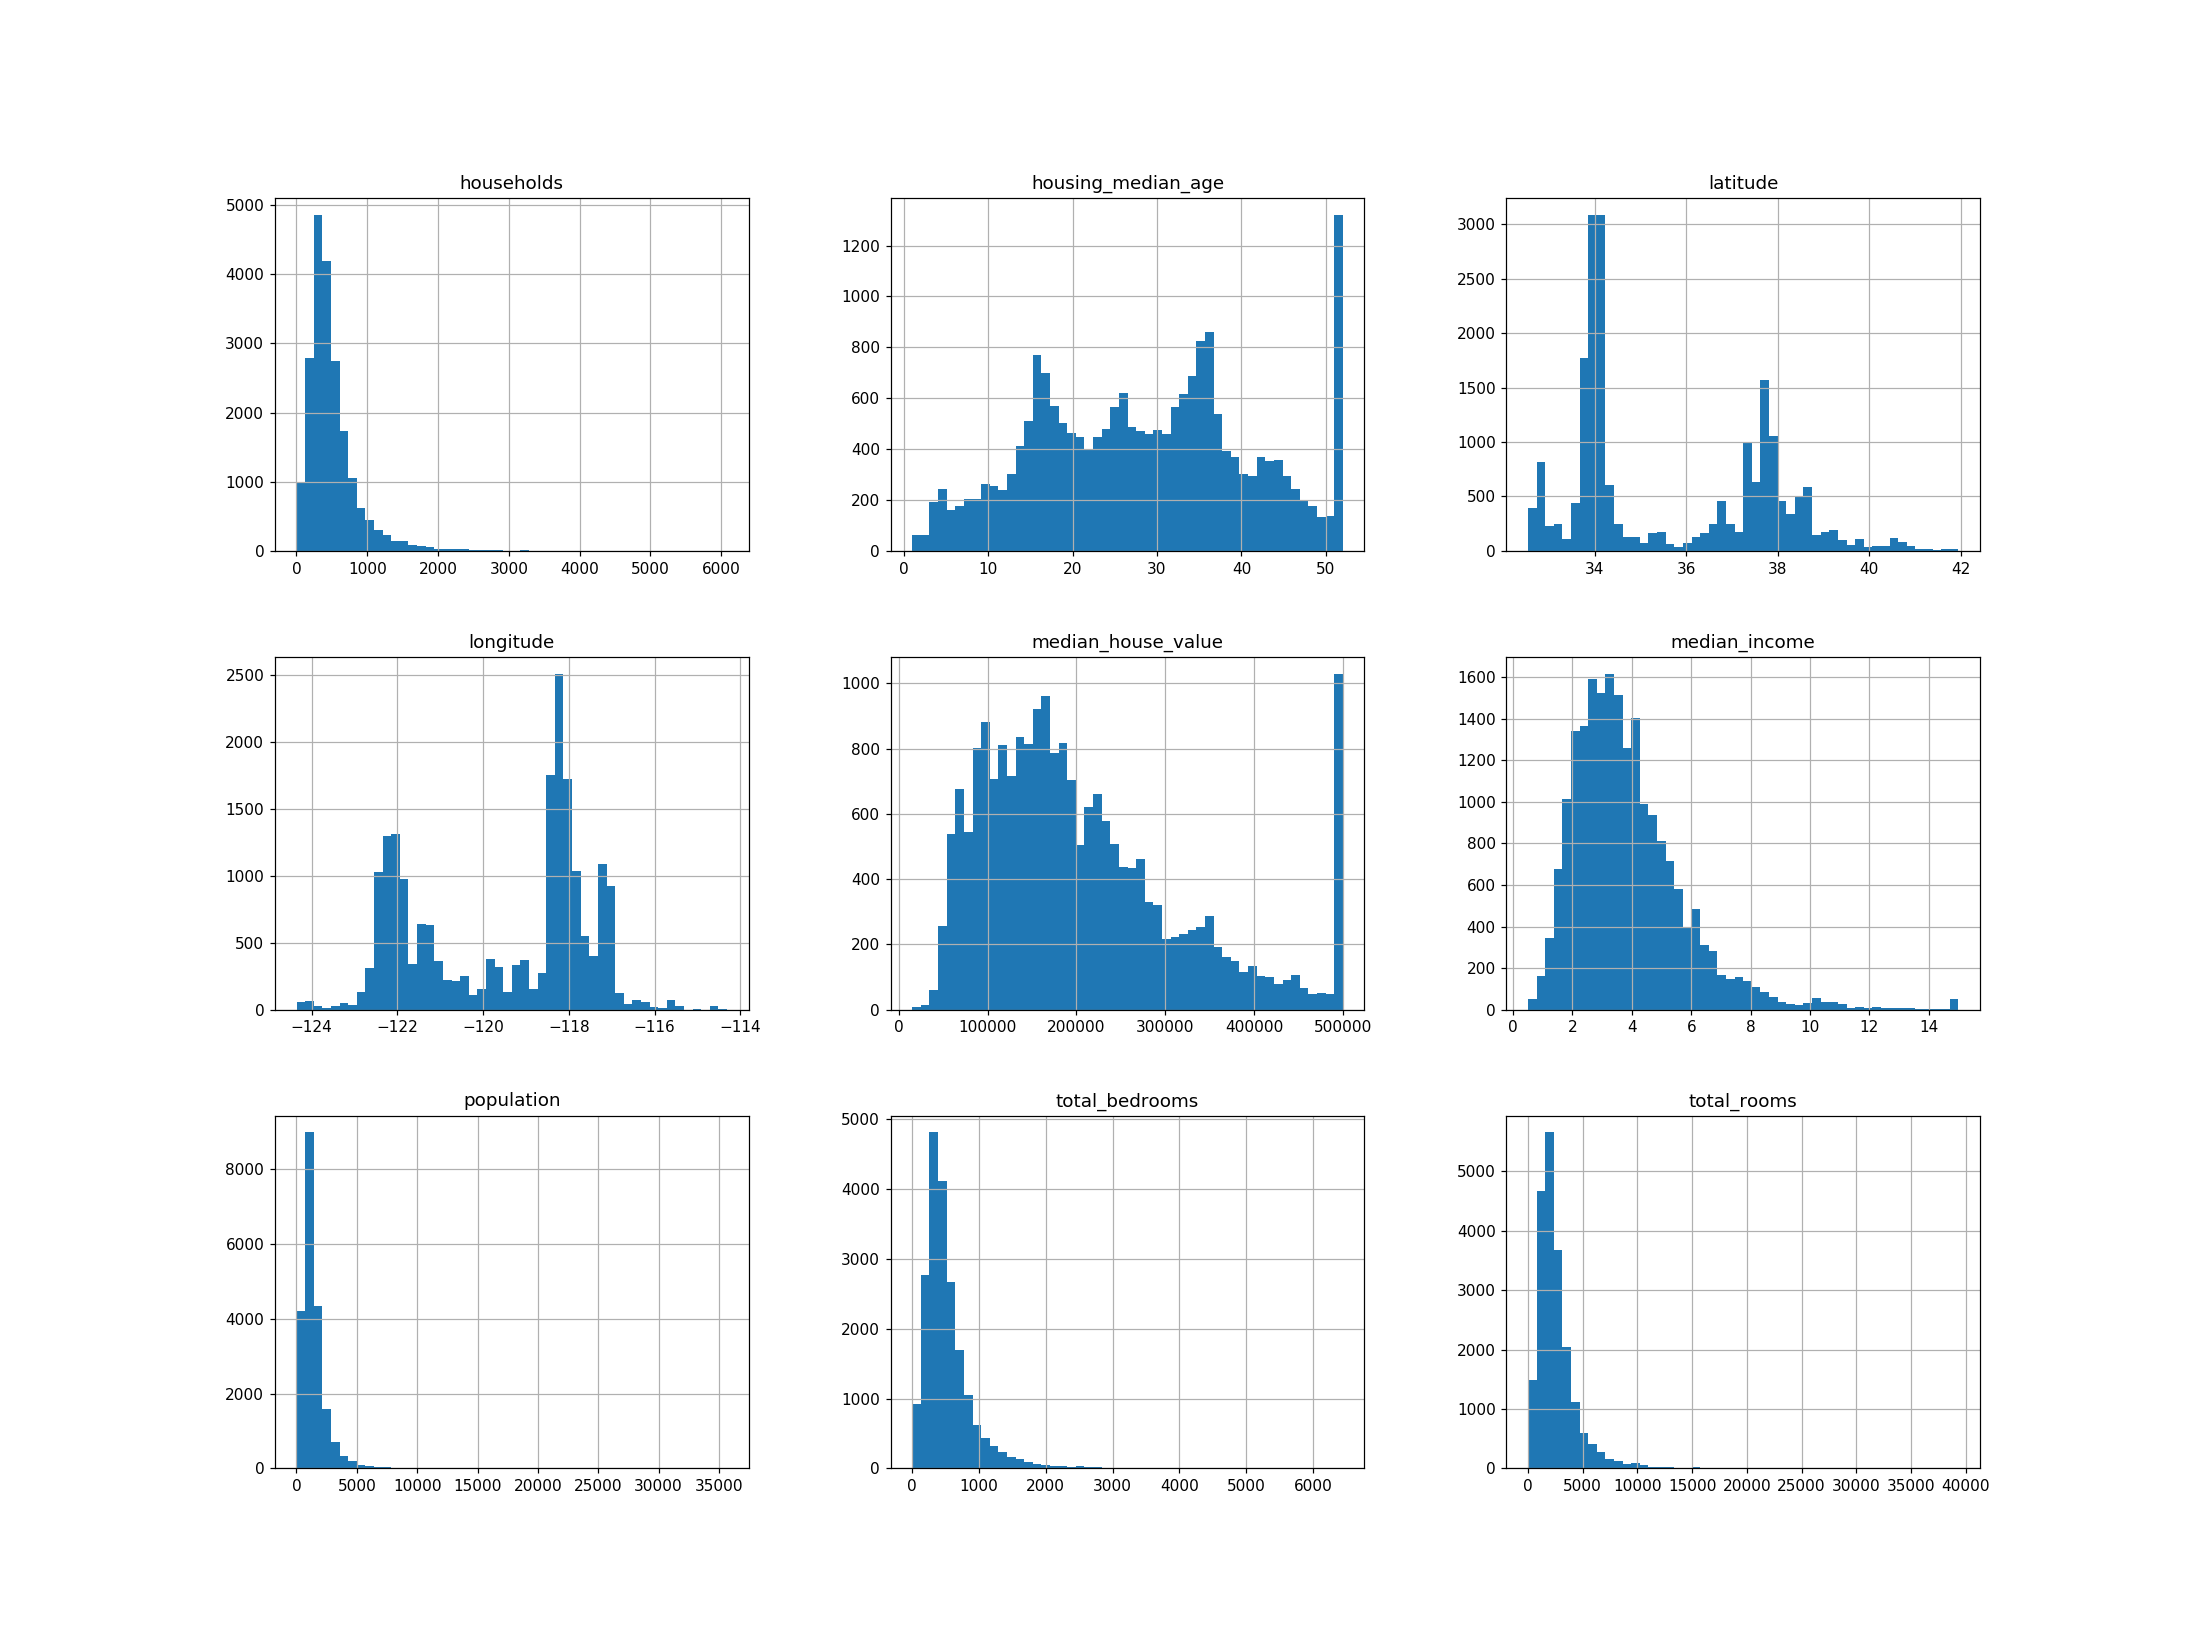

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18fd37f0>,
      dtype=object)

In [21]:

data_table.hist(bins=50, figsize=(20,15))

<IPython.core.display.Javascript object>


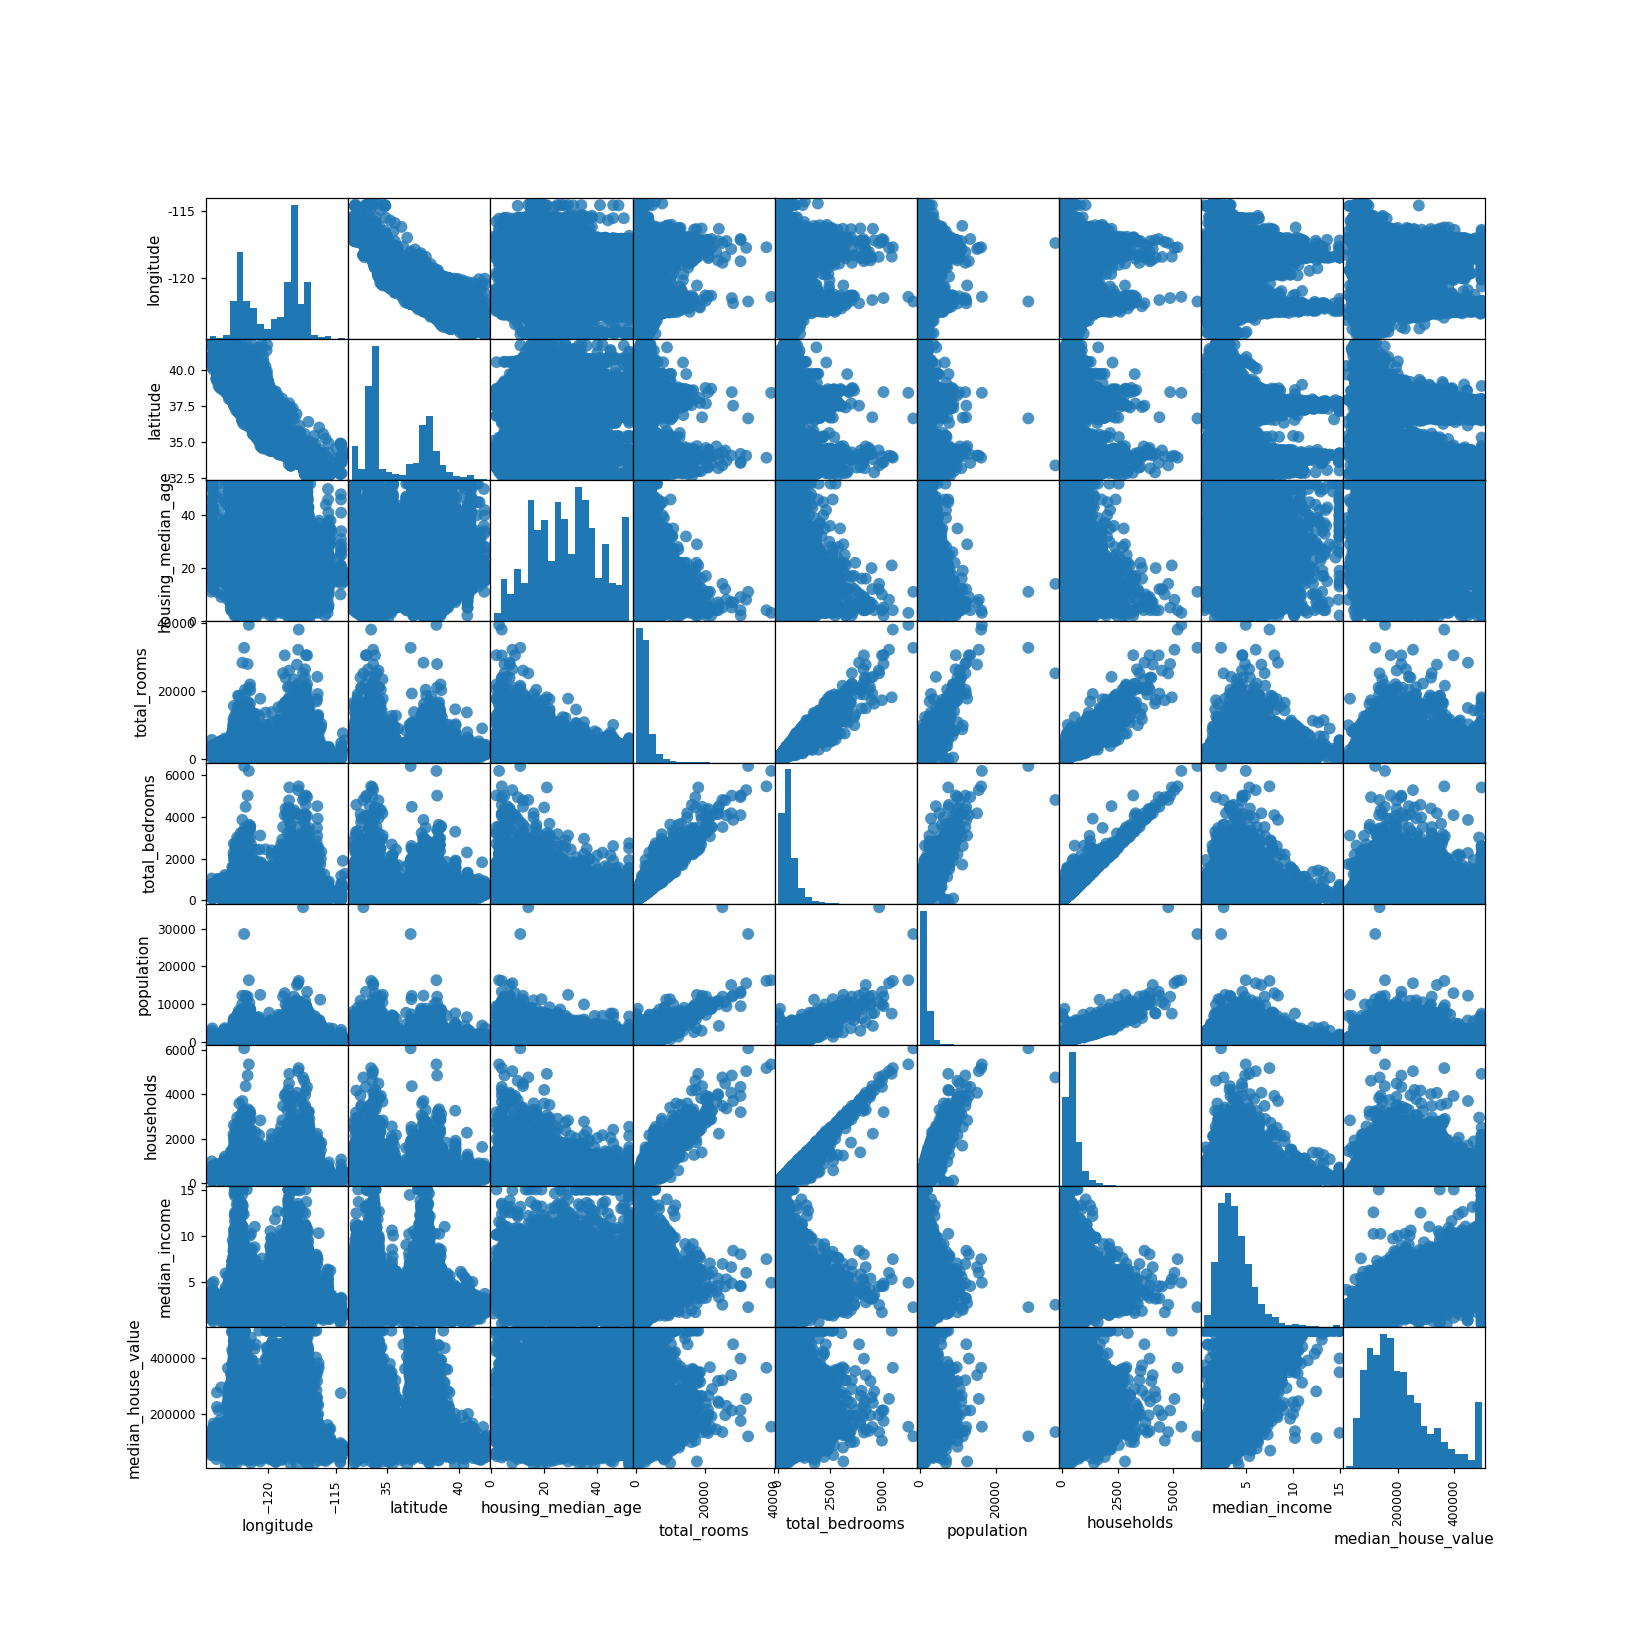

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15a514e0>,
      dtype=object)

In [16]:
pd.plotting.scatter_matrix(data_table, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)